# K-Nearest Neighbors Classification on Iris Data Set

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [2]:
# Change these features however you want, and the rest of the program will run accordingly
# Can be two of any of these four: SepalLength, SepalWidth, PetalLength, PetalWidth
feature1 = 'PetalLength'
feature2 = 'SepalWidth'

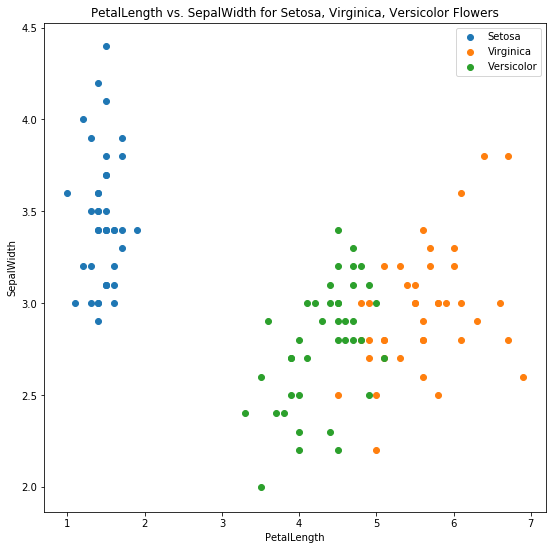

In [3]:
iris = pd.read_csv('iris_data.csv')
data = iris[[feature1, feature2, 'Species']]
train_data = data.loc[np.arange(0,40)].append(data.loc[np.arange(50,90)],ignore_index=True).append(data.loc[np.arange(100,140)],ignore_index=True)
test_data = data.loc[np.arange(40,50)].append(data.loc[np.arange(90,100)],ignore_index=True).append(data.loc[np.arange(140,150)],ignore_index=True)

x1 = np.array(train_data[train_data['Species'] == 'setosa'][feature1])
y1 = np.array(train_data[train_data['Species'] == 'setosa'][feature2])
x2 = np.array(train_data[train_data['Species'] == 'virginica'][feature1])
y2 = np.array(train_data[train_data['Species'] == 'virginica'][feature2])
x3 = np.array(train_data[train_data['Species'] == 'versicolor'][feature1])
y3 = np.array(train_data[train_data['Species'] == 'versicolor'][feature2])

plt.figure(figsize=(9,9))
plt.scatter(x1, y1, label="Setosa")
plt.scatter(x2, y2, label="Virginica")
plt.scatter(x3, y3, label="Versicolor")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(feature1 + ' vs. ' + feature2 + ' for Setosa, Virginica, Versicolor Flowers')
plt.legend()

In [4]:
def distance(array1, array2):
    """
    Calculates the Euclidian distance between two arrays of the same length 
    INPUTS:
        - array1, an array of length n
        - array2, an array of length n
    OUTPUTS:
        - euc_dist, the Euclidean Distance between array1 and array2
    """
    n = len(array1)
    total_sum = 0
    for i in range(n):
        total_sum += (array1[i] - array2[i])**2
    return math.sqrt(total_sum)

def all_distances(array1, train_df):
    """
    Calculates the Euclidean Distance between array1 and every row in train_data
    INPUTS:
        - array1, an array of length n
        - train_df, a Pandas DataFrame of size m x n
    OUTPUTS:
        - distances, a list of length m that consists of all the distances
                    between array1 and every row in train_df, respectively
    """
    n = len(array1)
    m = len(train_df.index)
    distances = []
    for i in range(m):
        a1 = array1
        a2 = np.array(train_df[[feature1, feature2]].loc[i])
        distances.append(distance(a1, a2))
    return distances
        
def KNN(array1, train_df, k = 5, plot = True):
    """
    Calculates the k-nearest neighbors of array1 in train_df and classifies array1
    INPUTS:
        - array1, an array of length n
        - train_df, a Pandas DataFrame of size m x n+1 where each row is a
                    data point and then has its classification
        - k, an int that decides how many neighbors should be checked.
            Default is 5
        - plot, if True, then array1 will be plotted along with train_df
                so we can visualize the data. Default is True
    OUTPUTS:
        - classification, the classification of array1
        - the plot of all the data points, if plot == True
    """
    n = len(array1)
    m = len(train_df)
    
    distances = all_distances(array1, train_df[[feature1, feature2]])
    df_copy = train_df
    df_copy['distances'] = distances
    df_copy = df_copy.sort_values('distances', ascending=True)
    top_k = df_copy.head(k)
    
    vi = np.count_nonzero(np.array(top_k['Species']) == 'virginica')
    ve = np.count_nonzero(np.array(top_k['Species']) == 'versicolor')
    se = np.count_nonzero(np.array(top_k['Species']) == 'setosa')
    temp_dict = {vi:"virginica", ve:'versicolor', se:'setosa'}
    classification = temp_dict[max(temp_dict)]
    
    if plot:
        plt.figure(figsize=(9,9))
        plt.scatter(x1, y1, label="Setosa", zorder=2)
        plt.scatter(x2, y2, label="Virginica", zorder=2)
        plt.scatter(x3, y3, label="Versicolor", zorder=2)
        plt.scatter(array1[0], array1[1], marker='^', label='Given Point - Classified as ' + classification, 
                    zorder=2, color='red', s=100)
        for i in range(k):
            plt.plot([array1[0], np.array(top_k[[feature1]])[i]], [array1[1], np.array(top_k[[feature2]])[i]], color='black', zorder=1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(feature1 + ' vs. ' + feature2 + ' for Setosa, Virginica, Versicolor Flowers')
        plt.legend()
    
    # Data Frame with the closest k points to the test point
    # print(top_k)
    return classification

'virginica'

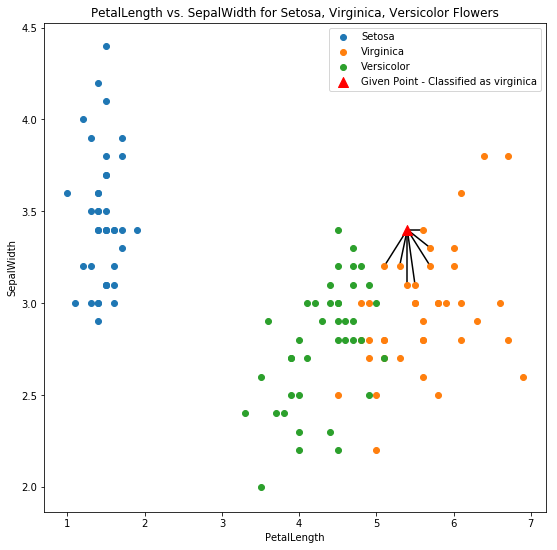

In [5]:
# Random Test Point from the Test Data Set
num = np.random.randint(0,30)
k = 7
KNN(np.array(test_data[[feature1, feature2]].loc[num]), train_data, k=k)

In [6]:
total_correct = 0
total = len(test_data.index.values)
for i in range(total):
    classification = KNN(np.array(test_data[[feature1, feature2]].loc[i]), train_data, plot=False)
    if classification == test_data['Species'].loc[i]:
        total_correct += 1
        
pct_correct = (float(total_correct)/float(total)) * 100
print('K-Nearest Neighbors Algorithm correctly guessed ' + str(round(pct_correct, 2)) + '% of the Test Data Set')

K-Nearest Neighbors Algorithm correctly guessed 100.0% of the Test Data Set
